# Project Name - Unsupervised ML - Netflix Movies and TV Shows Clustering

## Project Type - Unsupervised
## Contribution - Individual
## Name- Aarti

## **Project Summary**

This project is an exploratory data analysis (EDA) and clustering analysis of Netflix content data. The objective was to gain insights into the distribution, genres, and characteristics of Netflix content while applying machine learning techniques, particularly clustering, to uncover hidden patterns.

The initial phase of the project involves exploratory data analysis (EDA) to understand the structure and insights hidden in the dataset. This includes identifying the types of content available (TV Shows vs Movies), their distribution across countries, release years, ratings, and genres (listed_in). The dataset comprises 7787 entries with 12 columns, including metadata such as title, cast, country, director, date added, release year, and description. While there were missing values in columns like director, cast, and country, the data was clean from duplicate entries.

A TF-IDF vectorization technique was applied to convert the text-based 'description' and 'listed_in' feature into numerical format suitable for clustering. The text preprocessing steps included tokenization, stop word removal, lemmatization, and vectorization using TfidfVectorizer. The dimensionality of this data was then reduced using Principal Component Analysis (PCA) to make it easier to visualize and interpret.

With the vectorized and reduced features, K-Means clustering was implemented to group similar content. The optimal number of clusters was determined using the Elbow Method and Silhouette Scores, which helped understand the internal cohesion and separation of the clusters.

Hierarchical Clustering was also performed in the final steps of the project to validate and compare results obtained from K-Means clustering. Hierarchical clustering was visualized using a dendrogram, providing a different perspective on content similarity based on text-based features.

## **GitHub Link**
https://github.com/aartikumari16

## **Problem Statement**

**Project Description**

**Business Context**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the
number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**

Exploratory Data Analysis

Understanding what type content is available in different countries

If Netflix has been increasingly focusing on TV rather than movies in recent years

Clustering similar content by matching text-based features


## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import nltk
from nltk.corpus import stopwords
import string, unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

### Dataset Loading

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Netflix Internship Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
df.shape

(7787, 12)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

In [ ]:
print(df.duplicated().sum())


0


### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### What did you know about your dataset?

*   There are 7787 rowa and 12 coulmns.
*   No duplicate values present in the dataset.
*   Data type of all the columns is "Object", except for "release_date" which is int.
*   There are two types of value in "duration" column i.e min and seasons.
*   Null values are present in the following columns:
    
      director(2389), cast(718), country(507), date_added(10), rating(7)





## ***2. Understanding Your Variables***





In [ ]:
# column names

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Check Unique Values for each variable.**

In [ ]:
column= ["type","country","rating","listed_in","date_added","release_year","director","cast"]
for col in column:
   print(f"\nUnique values in column '{col}':")
   print(df[col].unique())


Unique values in column 'type':
['TV Show' 'Movie']

Unique values in column 'country':
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia' 'Germany' 'Denmark, France, Poland'
 'Poland' 'Kenya' 'New Zealand, United Kingdom' 'Pakistan' 'Australia'
 'Australia, United States' 'Mexico, United States' 'United States, China'
 'China, Hong Kong' 'Taiwan' 'United States, United Kingdom'
 'France, South Korea, Japan' 'United States, Canada'
 'United Kingdom, United States' 'Netherlands, Denmark, South Africa'
 'Canada, United States' 'Denmark' 'Hong Kong'
 'France, Netherlands, 

## ***3. Data Wrangling***

**Handling Missing Values**

In [ ]:
# as "date_added" and "ratings" columns have very few percentage of missing values, we can drop them

df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
# director, cast, and country has a very huge percentage of missing values. So filling them with "Unknown"

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

<ipython-input-12-907e588c790b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-12-907e588c790b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**Data Types**

In [ ]:
# date_added needs to be converted to "datetime"

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')


In [ ]:
# check data types

df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


**Handling Multiple Values in columns : country and listed_in**



In [ ]:
# Exploding 'country'
df['country'] = df['country'].str.split(', ')
df = df.explode('country', ignore_index=True)

# Exploding 'listed_in'
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in', ignore_index=True)


In [ ]:
# check shape of dataframe after exploding

df.shape

(20912, 12)

**Changing Data type of "duration" to int**

In [ ]:
# Splitting the duration column
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

,count
duration,
1,4163
2,932
3,489
4,222
5,150
6,63
7,50
8,35
9,21


In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101, 113, 114, 130,  94,
       140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,  96,
       126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,  29,
       142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57, 150,
       133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,  38,
        25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,  42,
        79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,  48,
       139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165, 166,
       138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,  14,
       177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200, 169,
        27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13, 214,
        17, 173, 192, 209, 187,  41, 182, 224,  37, 233, 189, 15

### What all manipulations have you done and insights you found?

*   **Dropped null values in columns "date_added" and "ratings"**, as they contribute a very less percrntage.
*   **Filled null values in columns "director", "cast", and "country" with "Unknown"**, as they contribute a huge percentage, hence can not be dropped.

*   Changed **data type of "date_added" to datetime**.
*   **Exploded "country" and "listed_in"** columns to seprate the multiple values for better analysis.
*   After Exploding **now we have 20912 rows and 12 columns** in the dataset.

*   Converted **data type of "duration" column to int**




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



**Univariate Analysis**

**1. What type of content is available on netflix**

<Axes: xlabel='type', ylabel='count'>

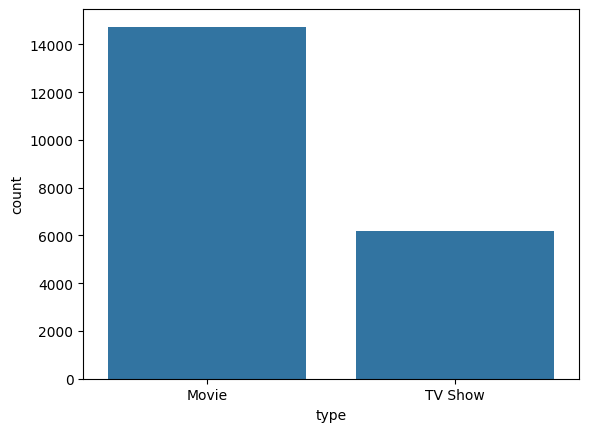

In [ ]:
contet_type=df["type"].value_counts().reset_index()
sns.barplot(data=contet_type,x="type",y="count")

**1. Why did you pick the specific chart?**

A bar chart is ideal for comparing the frequency of distinct categories — in this case, content types (Movie and TV Show).

It clearly shows which type dominates and by how much, making it perfect for analyzing categorical distributions.

**2. What is/are the insight(s) found from the chart?**

The bar chart shows that there are more movies than TV shows on Netflix.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Risk of Negative Growth**

The platform currently offers over twice as many Movies as TV Shows, revealing a significant skew in content type distribution.

**Why This Matters:**

TV Shows often lead to higher user retention due to episodic watching behavior.

A limited TV Show library may disengage loyal viewers and reduce average session times.

**Recommendation**

Diversify the TV Show catalog, especially in high-engagement genres (e.g., thrillers, dramas, regional series).

Leverage user data to identify underrepresented TV content categories and invest in production or acquisition.





**2. Top 10 Countries with highest contribution of Movies or TV shows.**



In [ ]:
highest_contribution_countries= df[df["country"].str.lower() != "unknown"]["country"].value_counts().reset_index().sort_values(by="count", ascending=False).head(10)

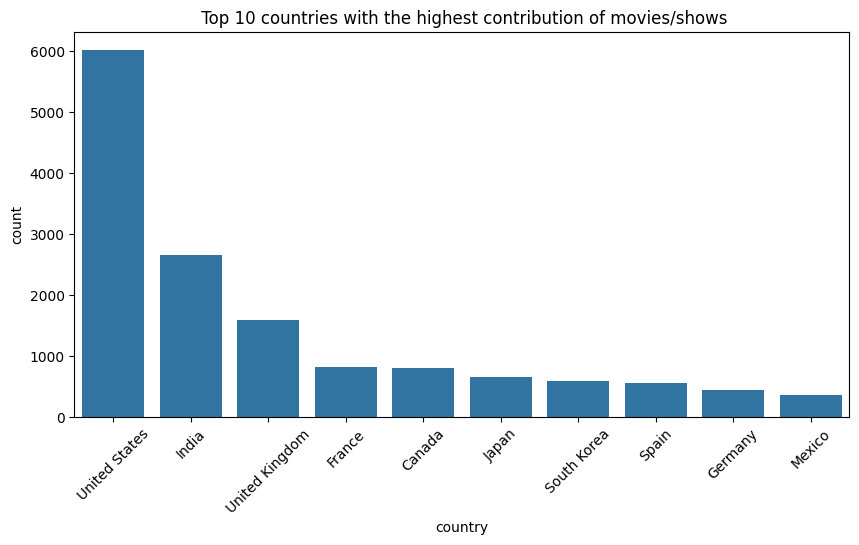

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=highest_contribution_countries,x="country",y="count")
plt.title(' Top 10 countries with the highest contribution of movies/shows')
plt.xticks(rotation=45)
plt.show()

**1. Why did you pick the specific chart?**

A bar chart is ideal for comparing the frequency of distinct categories.

It clearly shows which country dominates and by how much, making it perfect for analyzing categorical distributions.

**2. What is/are the insight(s) found from the chart?**

The highest number of movies / TV shows are from US, followed by India and UK.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Business Impact:**

The United States dominates the content library (6,009 titles), followed by India and the United Kingdom. This shows strong representation from a few major production hubs.

These countries can be prioritized for regional marketing campaigns, licensing deals, or localization strategies (e.g., dubbing or subtitles).

**Possible Insights Leading to Negative Growth:**

The concentration of content from a few select countries suggests limited geographic diversity in the catalog.

Underrepresentation of emerging markets or non-English-speaking regions may lead to lower engagement from those audiences.


**3. Years in which Movies/TV shows released**

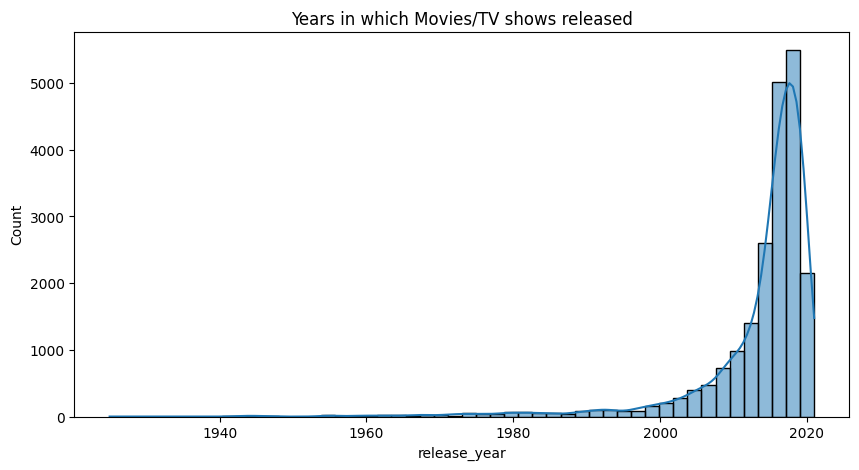

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df["release_year"],kde=True,bins=50)
plt.title('Years in which Movies/TV shows released')
plt.show()

**1. Why did you pick the specific chart?**

A histogram with KDE was selected because it effectively shows the distribution of content releases over time, allowing us to:

Identify trends in how the volume of movies and TV shows has changed year by year.

Understand whether the platform focuses more on recent content or includes a significant amount of older titles.

**2. What is/are the insight(s) found from the chart?**

Netflix has greater number of new movies / TV shows than the old ones.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Business Impact:**

The chart likely shows a sharp rise in content after around 2008. This reflects the platform's aggressive growth and content acquisition strategy during the streaming boom.

If there's a strong preference for recent content, the company can prioritize new releases to retain subscribers.

**Potential for Negative Growth:**

Chart shows very few titles before 2000, it suggests a lack of classic or archival content.

A decline in releases in the most recent years (e.g., post-2020) might indicate production slowdowns (possibly due to global events like COVID-19).


**4. TV Show duration**

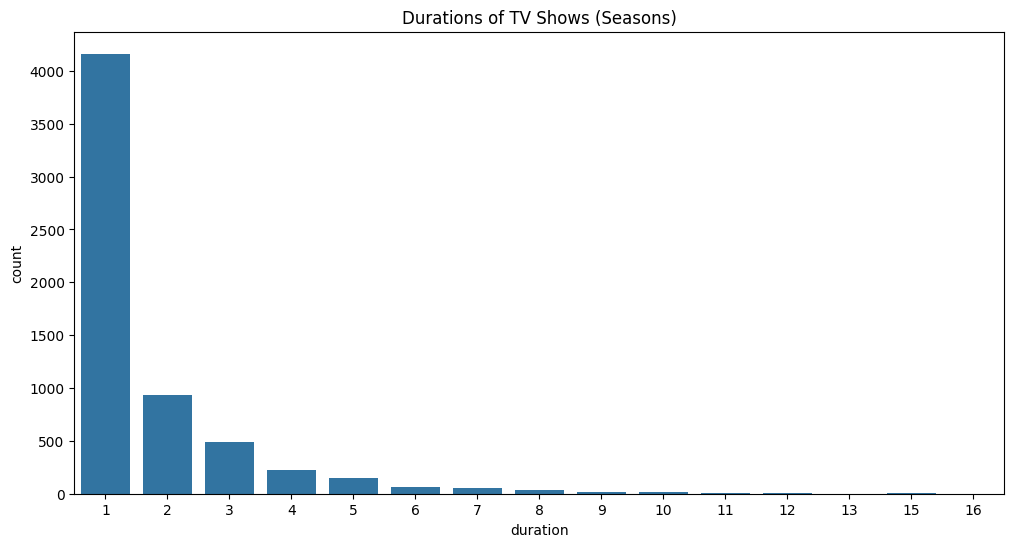

In [ ]:
tv_duration=df[df['type']=='TV Show'].duration.value_counts().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(tv_duration,x="duration",y="count")
plt.title('Durations of TV Shows (Seasons)')
plt.show()


**1. Why did you pick the specific chart?**

A bar chart because, the data consists of discrete categories (number of seasons for TV shows), and a bar chart clearly shows the frequency of each duration.

It is an effective way to compare how common different season lengths are across TV shows on the platform.

**2. What is/are the insight(s) found from the chart?**

The majority of TV shows have only 1 season, indicating that either limited series or short-run shows dominate the catalog.

There is a sharp drop in the number of shows as the number of seasons increases.

Multi-season shows (e.g., 2–5 seasons) are significantly less common, and very few shows extend beyond 6 or more seasons.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business impact:**

The platform seems to prioritize adding short-duration or single-season TV shows, which can cater well to users who prefer quick binge-watching or limited content.

These shorter shows may also be more cost-effective for licensing or production, offering quick content turnover.

**Potential negative growth area:**

Users seeking long-term engagement with multi-season shows may find the catalog limited.

Lack of long-form content could reduce viewer retention or satisfaction for audiences who prefer in-depth, ongoing narratives.

**5. Movies Length**

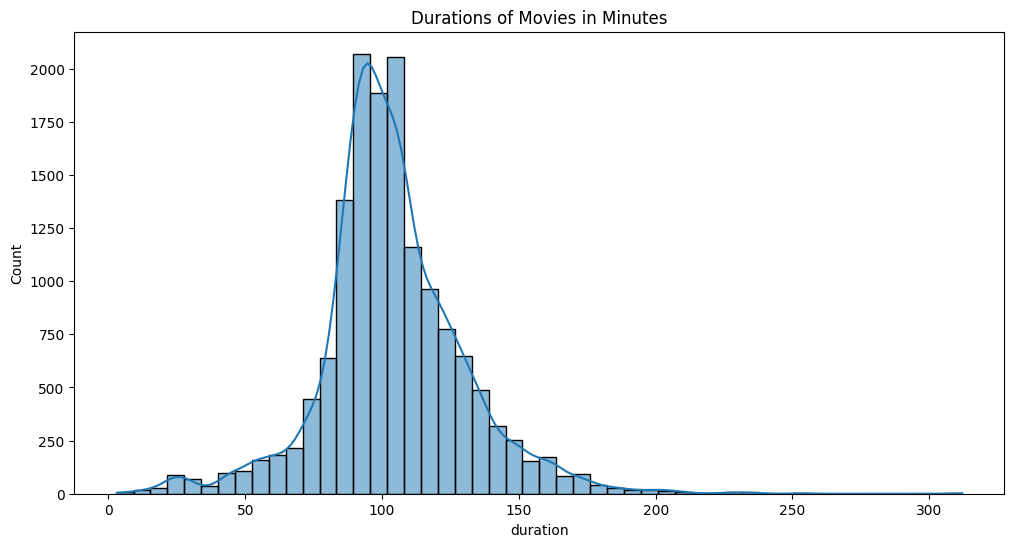

In [ ]:
movies_length= df[df['type'] == 'Movie']['duration']

plt.figure(figsize=(12,6))
sns.histplot(movies_length,kde=True,bins=50)
plt.title('Durations of Movies in Minutes')
plt.show()


**1. Why did you pick the specific chart?**

Histogram, because movie durations are continuous numerical data (in minutes).

A histogram is ideal for visualizing how this data is distributed across different ranges.

The addition of the KDE line provides a smoother view of the distribution.

**2. What is/are the insight(s) found from the chart?**

The distribution is right-skewed, with the majority of movies clustered between 80 to 120 minutes.

Very few movies are under 60 minutes or over 150 minutes.

There are some long-tail entries, possibly including documentaries or extended editions, which are outliers.


**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Knowing that users are most frequently offered movies between 80–120 minutes helps content teams maintain this sweet spot for viewer engagement.

Marketing and UX teams can better recommend content lengths based on user preferences and time availability.



**6. Number of Movies/shows added over the years**



In [ ]:
# extracting years from date

df["years_added"]=df["date_added"].dt.year

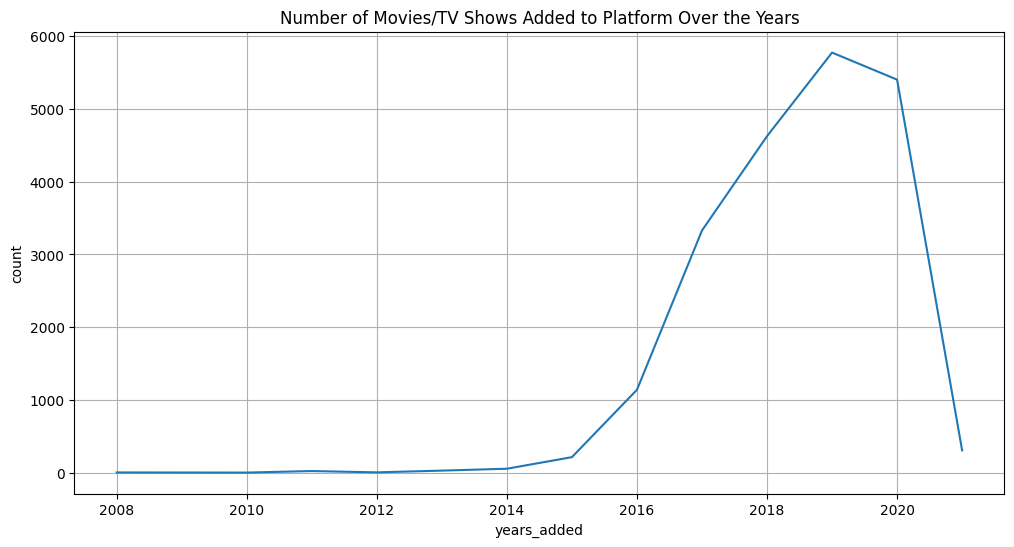

In [ ]:
yearly_addition = df['years_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(yearly_addition)
plt.title('Number of Movies/TV Shows Added to Platform Over the Years')
plt.grid(True)
plt.show()

**1. Why did you pick the specific chart?**

A line plot is ideal for showing how a variable changes over time. In this case, it effectively visualizes trends in the number of titles added to the platform each year.

**2. What is/are the insight(s) found from the chart?**

The number of titles added has generally increased over the years, showing growth in the platform’s content library.

There may be spikes around 2018-19, suggesting aggressive content acquisition or production during that period.

There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns.

**7. Number of Movies/shows added in different months.**

In [ ]:
# extracting months from date

df["month_added"]=df["date_added"].dt.month

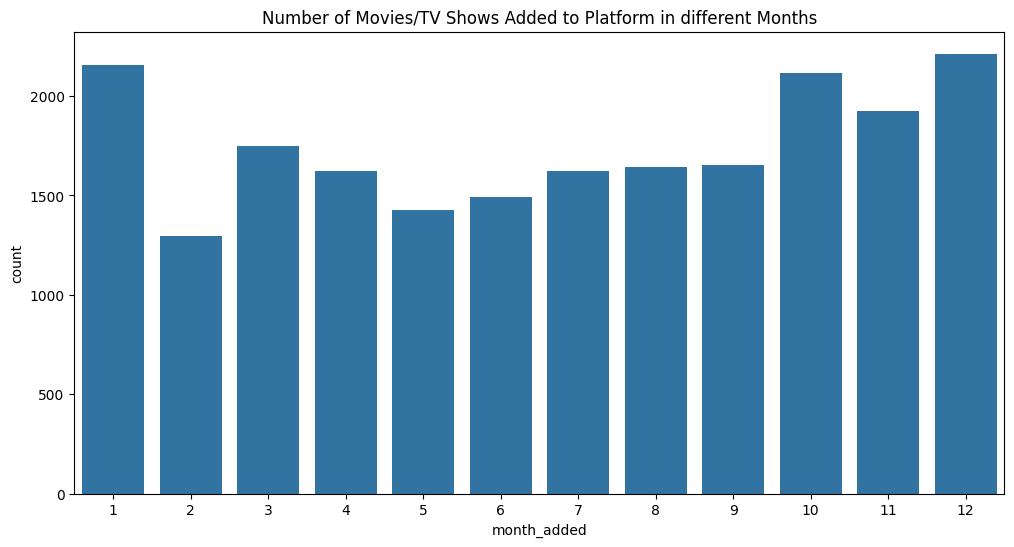

In [ ]:
monthly_addition = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(monthly_addition)
plt.title('Number of Movies/TV Shows Added to Platform in different Months')
plt.show()

**1. Why did you pick the specific chart?**

A bar chart makes it easy to identify which months saw higher or lower additions, enabling clear visual comparison.

**2. What is/are the insight(s) found from the chart?**

A greater number of shows were added in the months of October, November, December, and January.


**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions: **

By identifying high-performing months, the platform can optimize marketing campaigns and user acquisition efforts to align with peak content drops.

It can help improve content release strategy by filling gaps in slower months to maintain consistent user engagement.


**8. Distribution of Content Ratings on Netflix**

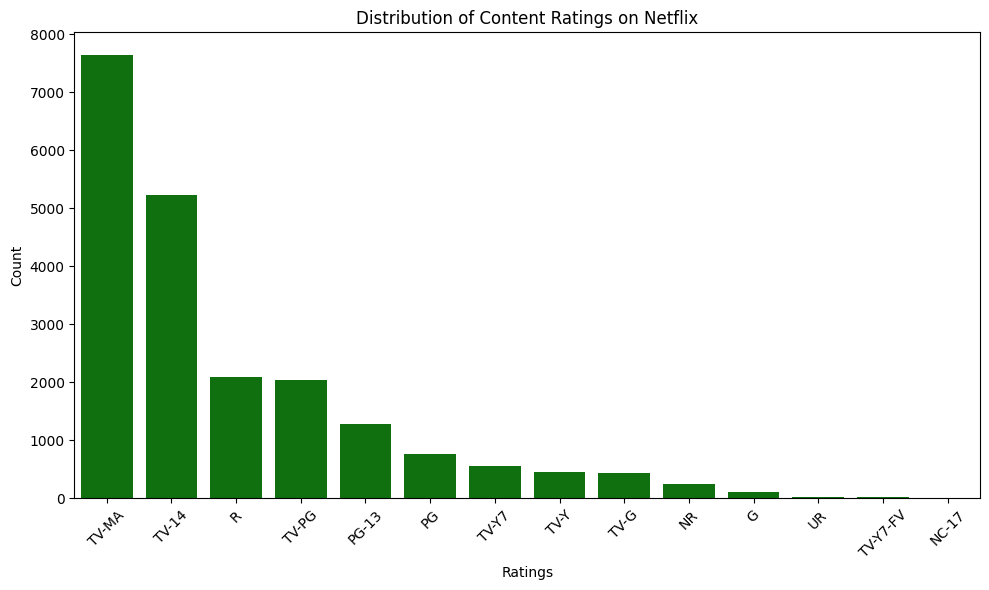

In [ ]:
ratings= df["rating"].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ratings,x="rating",y="count",color="green")

plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A bar plot is ideal for visualizing and comparing the frequency of each rating. It provides a clear view of which rating categories are most prevalent on the platform.

**2. What is/are the insight(s) found from the chart?**

Netflix’s content strategy is heavily oriented toward adult and teen audiences, with TV-MA, TV-14, and R making up the majority of the catalog.

Family-friendly content is available but forms a smaller part of the library.

Lesser-known and niche rating categories are minimal, showing a clear focus on mainstream ratings.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Understanding the distribution of content ratings helps Netflix align its offerings with audience preferences, and ensures age-appropriate recommendations.

TV-MA dominates, it shows Netflix is targeting adult viewers, which can guide content acquisition and marketing strategies for that demographic.

**However, there could be negative implications:**

A heavy skew toward mature content might alienate families or younger audiences, potentially reducing viewership in those segments.

A lack of balance across rating categories might limit the platform's appeal to a more diverse user base.


**Bivariate Analysis**

**9. Top 10 Countries by Number of Movies and TV Shows**

In [ ]:
type_by_country = df.groupby(['country', 'type']).size().reset_index(name='count')
pivot_table = type_by_country.pivot(index='country', columns='type', values='count').fillna(0).astype(int)

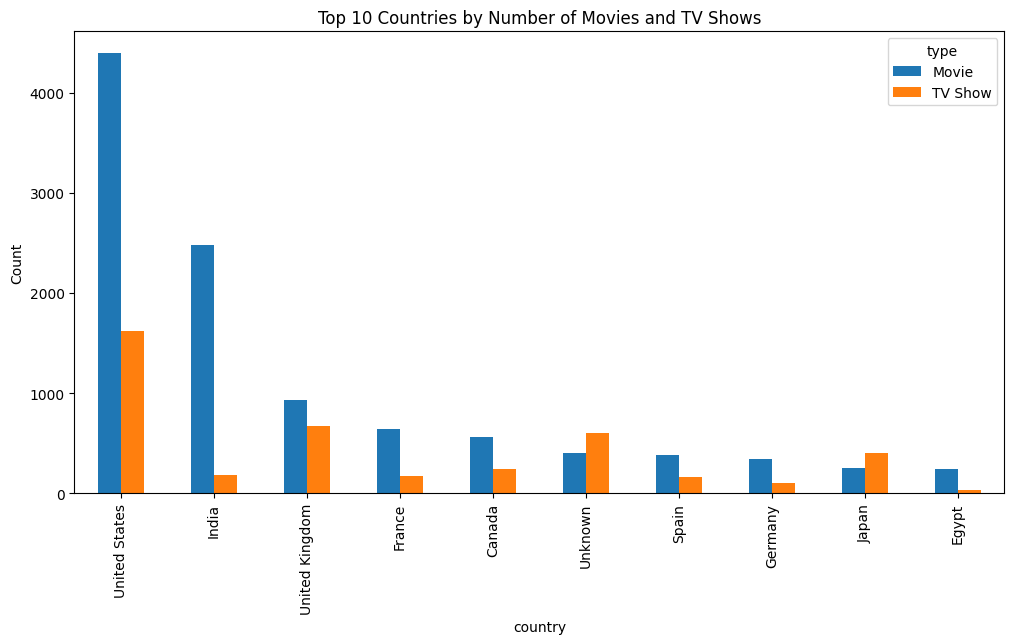

In [ ]:
pivot_table.sort_values('Movie', ascending=False).head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries by Number of Movies and TV Shows")
plt.ylabel("Count")
plt.show()


**1. Why did you pick the specific chart?**

A grouped bar effectively compares two categories (Movies and TV Shows) across a shared dimension (countries).

**2. What is/are the insight(s) found from the chart?**

Majority of the countries are focused on Movies than TV shows.

Only Japan is producing more TV shows than Movies. (In top 10 list)

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

It helps in content localization and licensing decisions, ensuring investment in countries with strong content pipelines.

**Potential risks of negative growth include:**

Over-dependence on content from certain countries (like the U.S.) might limit diversity and global appeal.



**10. If Netflix has been increasingly focusing on TV rather than movies in recent years.**

In [ ]:
trend = df.groupby(['years_added', 'type']).size().reset_index(name='count')
trend_pivot = trend.pivot(index='years_added', columns='type', values='count').fillna(0)

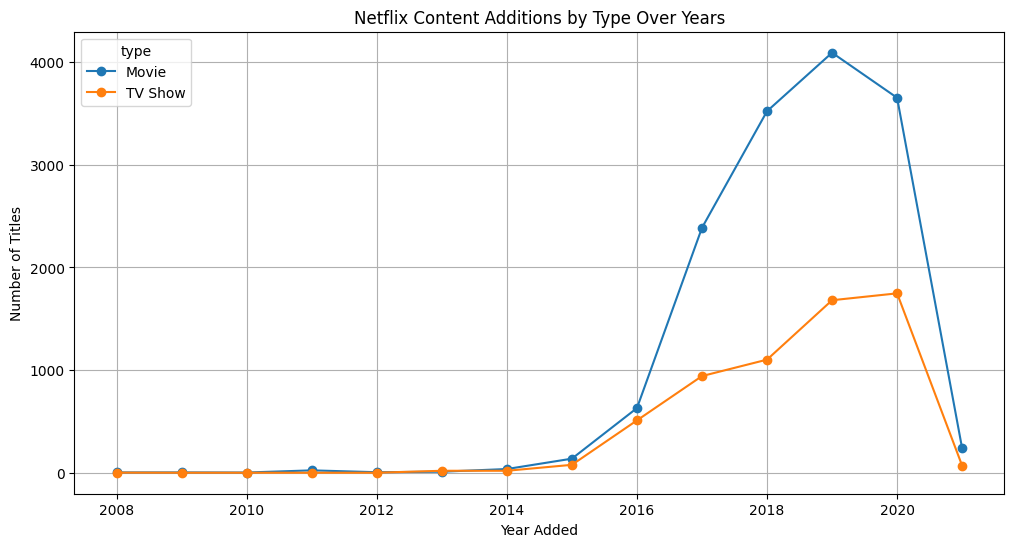

In [ ]:
trend_pivot.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Netflix Content Additions by Type Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


**1. Why did you pick the specific chart?**

A line chart is ideal for displaying trends over time. It helps track the yearly addition of Movies and TV Shows, making it easy to see how the volume of new content has changed and evolved across different years.

**2. What is/are the insight(s) found from the chart?**

Netflix is focusing more on Movies rather than TV shows in recent years.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

The consistently higher addition of Movies suggests that Netflix is catering to users who prefer short-form content that requires less time commitment.

This strategy may attract casual viewers and new subscribers looking for quick entertainment, which can boost platform engagement and acquisition.

**Negative growth in user engagement **if TV Shows are underrepresented:

TV Shows often lead to higher watch time and better retention, as users return for multiple episodes or seasons.

Over-investing in Movies while under-serving demand for episodic content could result in lost opportunities to maintain long-term viewer engagement and subscriber churn.


**11. Top genres in TV shows and Movies**

In [ ]:
top_genres_by_type = df.groupby(['type', 'listed_in'])['title'].count().reset_index()
top_genres_by_type.columns = ['Type', 'Genre', 'Count']

In [ ]:
# top 10 genres for each type
top_movies_genres = top_genres_by_type[top_genres_by_type['Type'] == 'Movie'].sort_values(by='Count', ascending=False).head(10)
top_tv_genres = top_genres_by_type[top_genres_by_type['Type'] == 'TV Show'].sort_values(by='Count', ascending=False).head(10)

<ipython-input-38-0c3f680ffef1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies_genres, y='Genre', x='Count', ax=axes[0], palette='Blues_d')
<ipython-input-38-0c3f680ffef1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tv_genres, y='Genre', x='Count', ax=axes[1], palette='Greens_d')


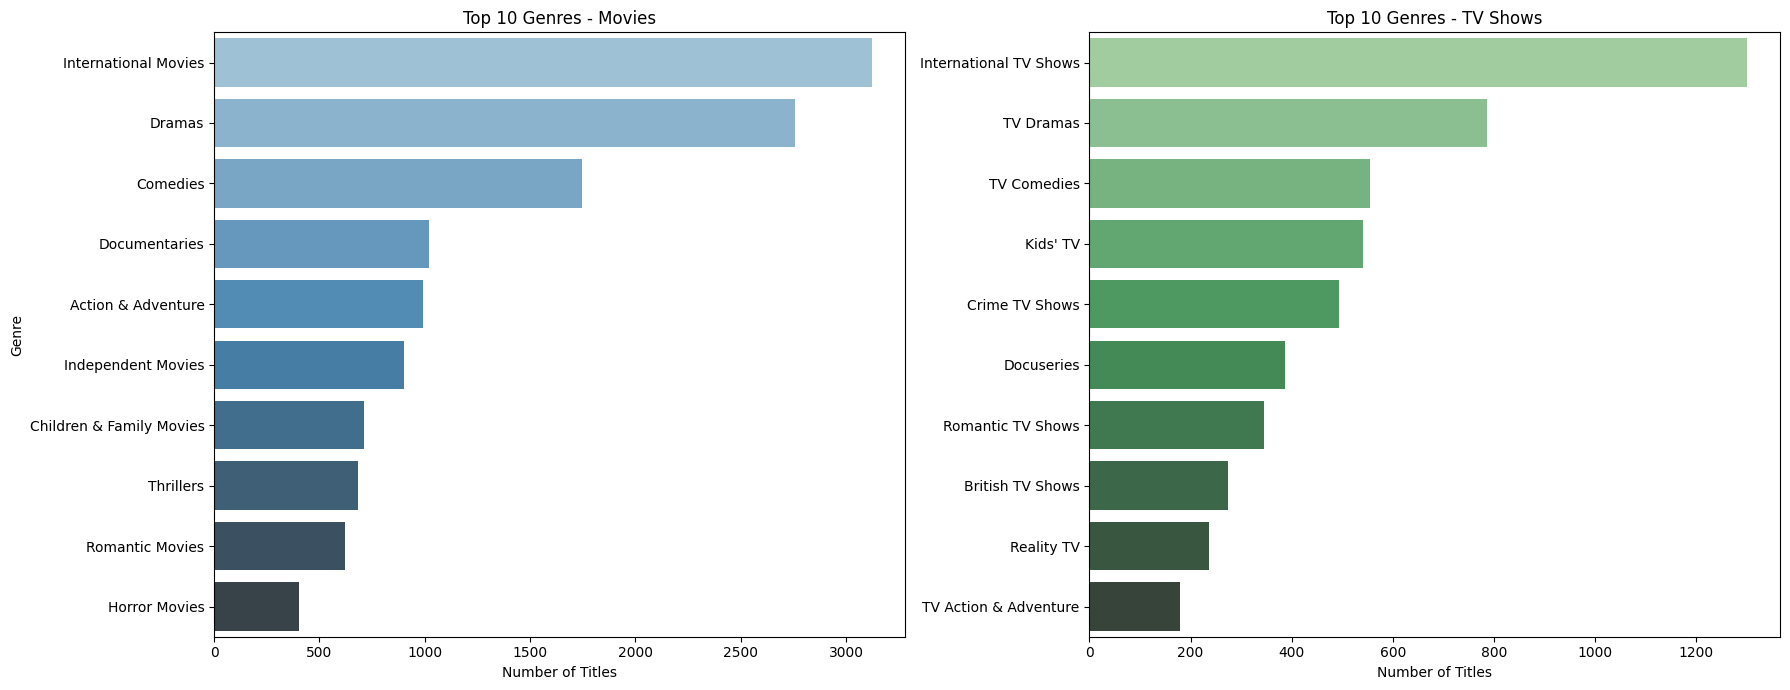

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=False)

sns.barplot(data=top_movies_genres, y='Genre', x='Count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Genres - Movies')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Genre')


sns.barplot(data=top_tv_genres, y='Genre', x='Count', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Genres - TV Shows')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A horizontal bar chart clearly displays categorical data (genres) and their respective counts in a visually intuitive way.

Separating the charts for Movies and TV Shows allows us to compare the top 10 genres for each type without crowding a single plot, ensuring clarity and better genre-wise comparison.

**2. What is/are the insight(s) found from the chart?**

Most popular genre in Movies is International Movies followed by Dramas, Comedies and Documentries.

Most popular genre in TV Shows is International TV Shows followed by TV Dramas, TV Comedies and Kids TV.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Netflix can continue strengthening its catalog in the top-performing genres such as international content, dramas, and comedies, which clearly resonate with global audiences.

The strong presence of Kids TV under TV Shows also highlights an opportunity to attract and retain family and younger audiences.




**12. Country Genre Diversity**

In [ ]:
country_genre_diversity =df.groupby("country")["listed_in"].nunique().reset_index()
country_genre_diversity.columns = ['Country', 'Unique_Genre_Count']


In [ ]:
# Filter out "Unknown" countries

country_genre_diversity = country_genre_diversity[country_genre_diversity['Country'] != "Unknown"]

# Sort countries by the number of unique genres
country_genre_diversity = country_genre_diversity.sort_values('Unique_Genre_Count', ascending=False).reset_index(drop=True)

<ipython-input-41-c96eca7479ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_genre_diversity.head(20), x='Country', y='Unique_Genre_Count', palette='viridis')


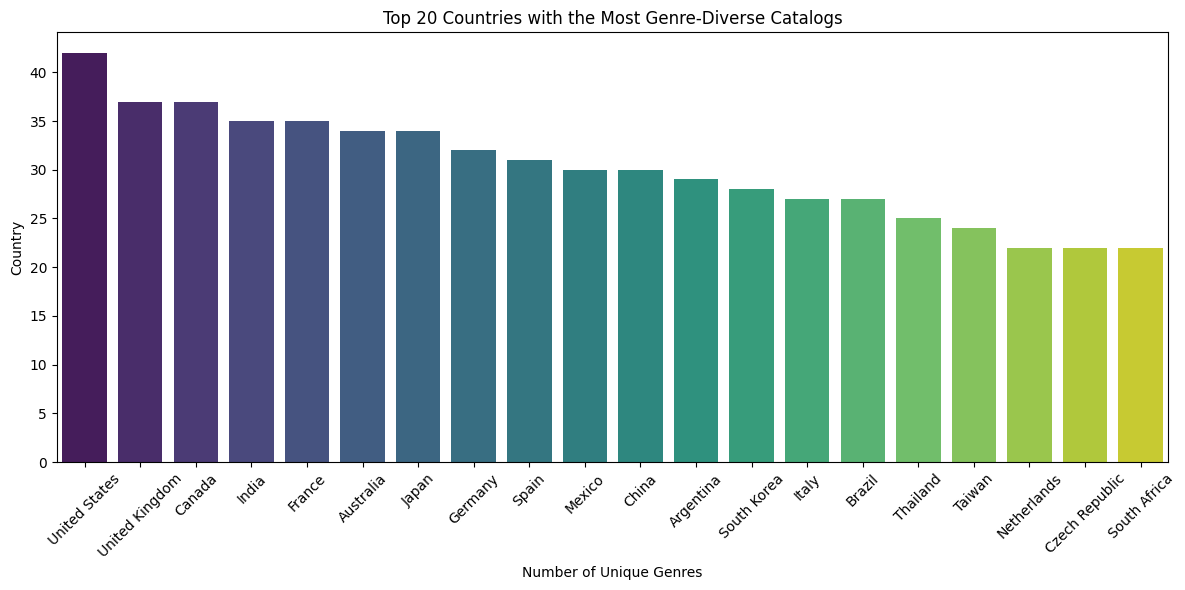

In [ ]:
# Plotting genre diversity by country
plt.figure(figsize=(12,6))
sns.barplot(data=country_genre_diversity.head(20), x='Country', y='Unique_Genre_Count', palette='viridis')
plt.title('Top 20 Countries with the Most Genre-Diverse Catalogs')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A bar plot effectively illustrates and compares the number of unique genres available in each country.

This format is ideal when analyzing categorical variables like country names against numerical values like genre counts.


**2. What is/are the insight(s) found from the chart?**

With 42 unique genres, the United States has the most diverse content catalog on Netflix, offering a wide range of genres to its users.

Both the United Kingdom (37) and Canada (37) have a highly diverse catalog. Followed by India(35) and France(35).

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Netflix can use this data to replicate high-performing genre diversity strategies in other countries with less variety, thereby enhancing user engagement and satisfaction.


**13. content availability- globally vs locally**

In [ ]:
# how many countries each title appears in
title_country_count = df.groupby('title')['country'].nunique().reset_index()

# column to classify content as 'Global' or 'Local'
title_country_count['exclusivity'] = title_country_count['country'].apply(lambda x: 'Global' if x > 1 else 'Local')

# how many titles are Global vs Local
exclusivity_count = title_country_count['exclusivity'].value_counts().reset_index()
exclusivity_count.columns = ['Exclusivity', 'Count']

print(exclusivity_count)

  Exclusivity  Count
0       Local   6620
1      Global   1150


In [ ]:
# Compare TV Shows vs Movies (Multi-Country Content)

# Group by title, type (Movie/TV Show), and count the unique number of countries
content_country_type_count = df.groupby(['title', 'type'])['country'].nunique().reset_index()

# column to classify content as 'Global' or 'Local' based on the number of countries
content_country_type_count['exclusivity'] = content_country_type_count['country'].apply(lambda x: 'Global' if x > 1 else 'Local')

# Count Global vs Local for TV Shows and Movies
exclusivity_by_type = content_country_type_count.groupby(['type', 'exclusivity'])['title'].count().unstack().reset_index()

print(exclusivity_by_type)

exclusivity     type  Global  Local
0              Movie     926   4446
1            TV Show     224   2174


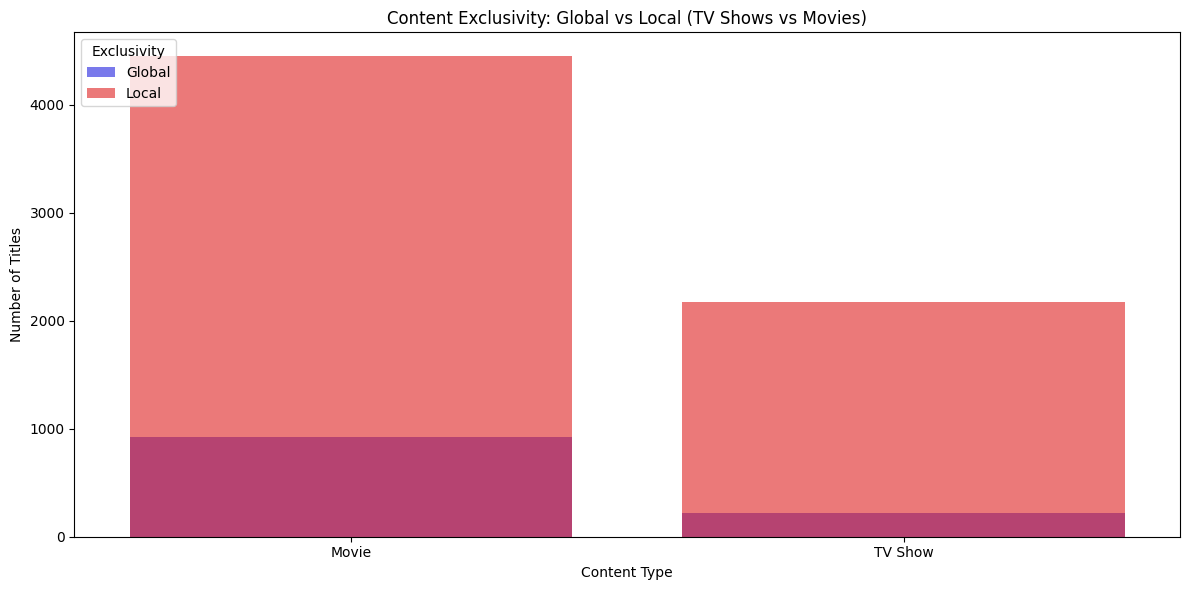

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting the bar plot with the exclusivity count for both Global and Local content
sns.barplot(data=exclusivity_by_type, x='type', y='Global', color='b', label='Global', alpha=0.6)
sns.barplot(data=exclusivity_by_type, x='type', y='Local', color='r', label='Local', alpha=0.6)

plt.title('Content Exclusivity: Global vs Local (TV Shows vs Movies)')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.legend(title='Exclusivity', loc='upper left')

plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A stacked bar plot allows for an intuitive visual comparison of global vs. local exclusivity across content types (Movies and TV Shows).

By overlaying the bars for "Global" and "Local" on the same axis, it clearly demonstrates how much of each content type is regionally exclusive versus globally available.

**2. What is/are the insight(s) found from the chart?**

Netflix offers 926 movies globally, making them more widely accessible compared to TV shows.

Both movies (4,446) and TV shows (2,174) have a much higher count of regionally exclusive content, emphasizing that Netflix is prioritizing localized content for its user base worldwide.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

The high volume of local exclusives signals Netflix's focus on regional markets, helping to deepen customer engagement by offering culturally relevant content.

Global movies enhance Netflix's brand consistency and value proposition across markets, appealing to a wider international audience.


**14. Content Release Year vs. Year Added to Netflix**

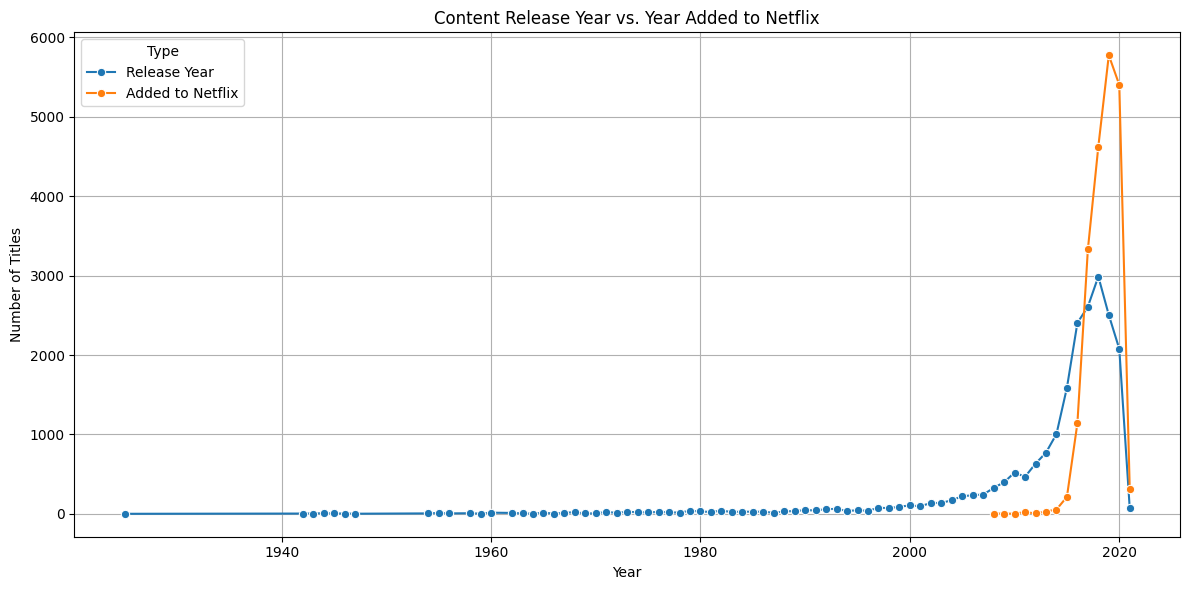

In [ ]:
# how many titles were added by release year
release_trend = df['release_year'].value_counts().sort_index().reset_index()
release_trend.columns = ['Year', 'Count']
release_trend['Type'] = 'Release Year'

# how many titles were added by addition year
add_trend = df['years_added'].value_counts().sort_index().reset_index()
add_trend.columns = ['Year', 'Count']
add_trend['Type'] = 'Added to Netflix'

# Combine both
trend_df = pd.concat([release_trend, add_trend])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x='Year', y='Count', hue='Type', marker='o')
plt.title('Content Release Year vs. Year Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A line chart was selected because it effectively illustrates trends over time, making it easy to compare how the number of titles released each year contrasts with the number of titles added to Netflix annually.

This dual-line format allows stakeholders to observe both production patterns and content acquisition strategies over the years.

**2. What is/are the insight(s) found from the chart?**

Netflix’s growth strategy relied heavily on adding both new and older titles during its expansion phase (2015-2020).

The sharp decline post-2020 suggests either a strategic shift or an industry-wide impact.

The platform continues to maintain a mix of classic and contemporary content.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Understanding release vs. addition lag can help Netflix optimize acquisition timelines and negotiate faster rights to stay competitive.

Identifying spike years for new content addition may reflect successful campaigns or market expansions, which can be replicated or scaled.

**Negative impact potential** lies in delayed acquisition—if newer content consistently takes years to appear on Netflix, users might shift to platforms offering more up-to-date catalogs, leading to churn.


## ***5. Hypothesis Testing***

**Hypothesis 1: Movies vs. TV Shows**

**Null Hypothesis (H₀):** The proportion of TV shows and movies added to Netflix per year has remained constant over time.

**Alternate Hypothesis (H₁):** The proportion of TV shows added to Netflix per year has increased significantly over time.

**Statistical Test:**

**Test Type:** Chi-Square Test for Proportions

**Why:** To check if the proportions of TV shows and movies added over the years have changed significantly.

In [ ]:
# Grouping data by year and content type
yearly_content = df.groupby(['years_added', 'type']).size().unstack().fillna(0)

# Getting the total number of titles added per year
yearly_content['Total'] = yearly_content.sum(axis=1)

# Calculating proportions of TV Shows and Movies for each year
yearly_content['TV_Show_Proportion'] = yearly_content['TV Show'] / yearly_content['Total']
yearly_content['Movie_Proportion'] = yearly_content['Movie'] / yearly_content['Total']

# Preparing contingency table
observed = yearly_content[['TV Show', 'Movie']].values

# Performing the Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Reject the Null Hypothesis: The proportion of TV shows added to Netflix per year has increased significantly.")
else:
    print("Fail to Reject the Null Hypothesis: No significant change in the proportion of TV shows added over time.")

Chi-Square Statistic: 267.02201091246326
P-value: 1.8456859287763694e-49
Reject the Null Hypothesis: The proportion of TV shows added to Netflix per year has increased significantly.


**Hypothesis 2: Genre Diversity Analysis**

**Null Hypothesis (H₀):** The distribution of genres across countries is the same (no significant difference).

**Alternate Hypothesis (H₁):** The distribution of genres varies significantly across countries.

**Statistical Test:**

**Test Type:** Chi-Square Test of Independence

**Why:** To check if genre preferences differ significantly across countries.





In [ ]:
# Creating a contingency table for genres by country
genre_country_table = pd.crosstab(df['country'], df['listed_in'])


# Performing the Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(genre_country_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Reject the Null Hypothesis: The distribution of genres varies significantly across countries.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in the genre distribution across countries.")



Chi-Square Statistic: 25462.79427320583
P-value: 0.0
Reject the Null Hypothesis: The distribution of genres varies significantly across countries.


## ***6. Feature Engineering & Data Pre-processing***

Cluster the shows on Netflix based on the following attributes:

Listed in (genres)

Description

In [ ]:
df1 = df.copy()

In [ ]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['listed_in'] +' ' + df1['description'])

**Lower Casing and Removing Stop Words**

In [ ]:
# Download stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Display stopwords as numpy array
print(np.array(sw))

['a' 'about' 'above' 'after' 'again' 'against' 'ain' 'all' 'am' 'an' 'and'
 'any' 'are' 'aren' "aren't" 'as' 'at' 'be' 'because' 'been' 'before'
 'being' 'below' 'between' 'both' 'but' 'by' 'can' 'couldn' "couldn't" 'd'
 'did' 'didn' "didn't" 'do' 'does' 'doesn' "doesn't" 'doing' 'don' "don't"
 'down' 'during' 'each' 'few' 'for' 'from' 'further' 'had' 'hadn' "hadn't"
 'has' 'hasn' "hasn't" 'have' 'haven' "haven't" 'having' 'he' "he'd"
 "he'll" 'her' 'here' 'hers' 'herself' "he's" 'him' 'himself' 'his' 'how'
 'i' "i'd" 'if' "i'll" "i'm" 'in' 'into' 'is' 'isn' "isn't" 'it' "it'd"
 "it'll" "it's" 'its' 'itself' "i've" 'just' 'll' 'm' 'ma' 'me' 'mightn'
 "mightn't" 'more' 'most' 'mustn' "mustn't" 'my' 'myself' 'needn'
 "needn't" 'no' 'nor' 'not' 'now' 'o' 'of' 'off' 'on' 'once' 'only' 'or'
 'other' 'our' 'ours' 'ourselves' 'out' 'over' 'own' 're' 's' 'same'
 'shan' "shan't" 'she' "she'd" "she'll" "she's" 'should' 'shouldn'
 "shouldn't" "should've" 'so' 'some' 'such' 't' 'than' 'that' "that

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# function to remove stop words
def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

**Remove Punctuations**

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)


**Removing URLs & Removing words and digits contain digits.**

In [ ]:
def remove_non_ascii(words):

    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

**Text Normalization - Lemmatization**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
nltk.download('wordnet')

df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Tokenization**

In [ ]:
tokenizer = TweetTokenizer()


In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))


**Vectorization**

In [ ]:
clustering_data = df1['clustering_attributes']


In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 500)
X = tfidf.fit_transform(clustering_data)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 145113 stored elements and shape (20912, 500)>

In [ ]:
X.shape

(20912, 500)

In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

**Dimensionality Reduction**

Reduces training time.

Can improve accuracy by removing redundant or irrelevant features

Eliminates less important features (noise), making data cleaner and more meaningful.



In [ ]:
# using PCA to reduce dimensionality

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

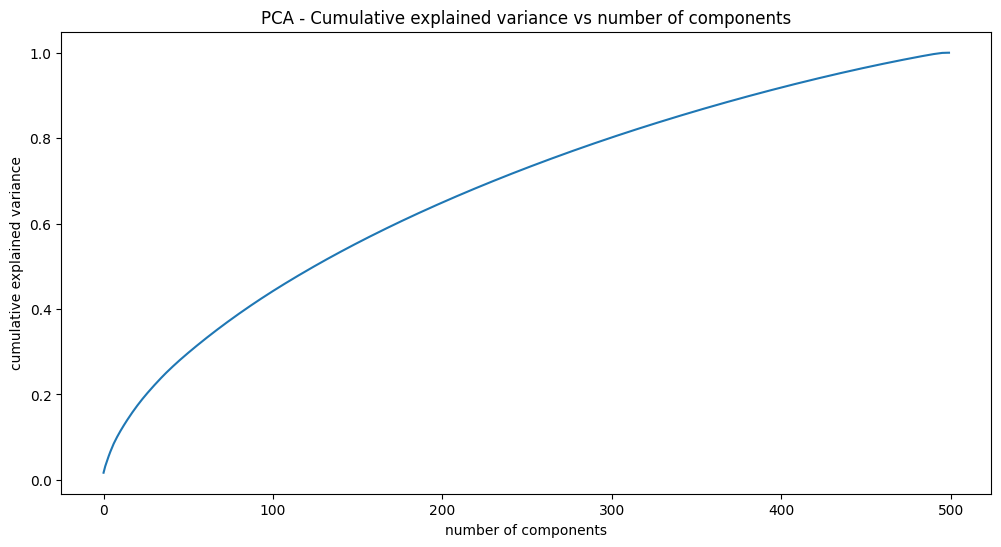

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
component_range = [2,4,5,10]
silhouette_scores = []

for n in component_range:
    print(f"\nRunning PCA with {n} components...")
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Apply KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters if needed
    labels = kmeans.fit_predict(X_pca)

    # Calculate silhouette score
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {n} components: {score:.4f}")



Running PCA with 2 components...
Silhouette Score for 2 components: 0.5458

Running PCA with 4 components...
Silhouette Score for 4 components: 0.4848

Running PCA with 5 components...
Silhouette Score for 5 components: 0.4078

Running PCA with 10 components...
Silhouette Score for 10 components: 0.2708


In [ ]:
# reducing the dimensions to 2 using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)

PCA(n_components=2, random_state=42)

In [ ]:
x_pca = pca.transform(X)


In [ ]:
# shape of transformed vectors
x_pca.shape


(20912, 2)

## ***ML Model Implementation***

### **K Means Clustring**

**Elbow method to find the optimal value of k**

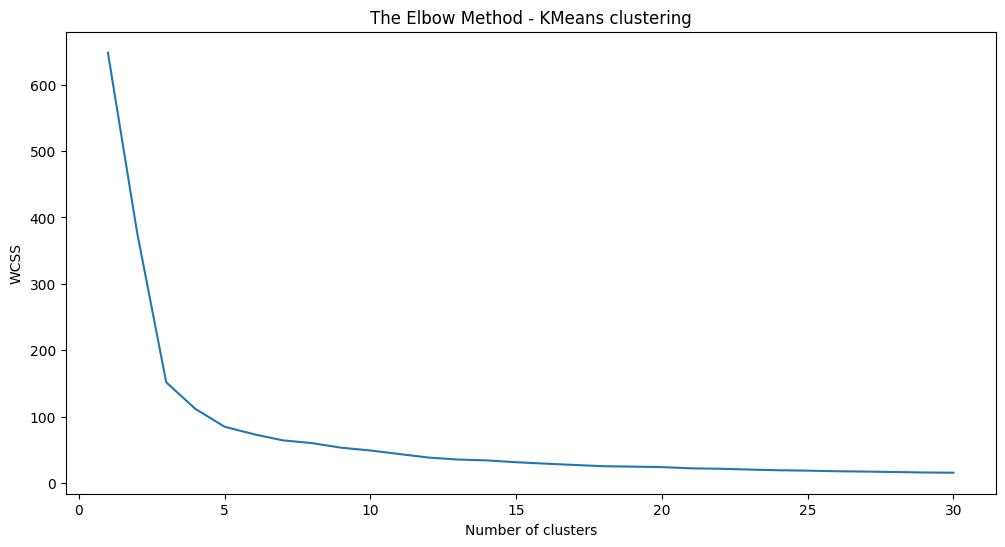

In [ ]:
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(12,6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

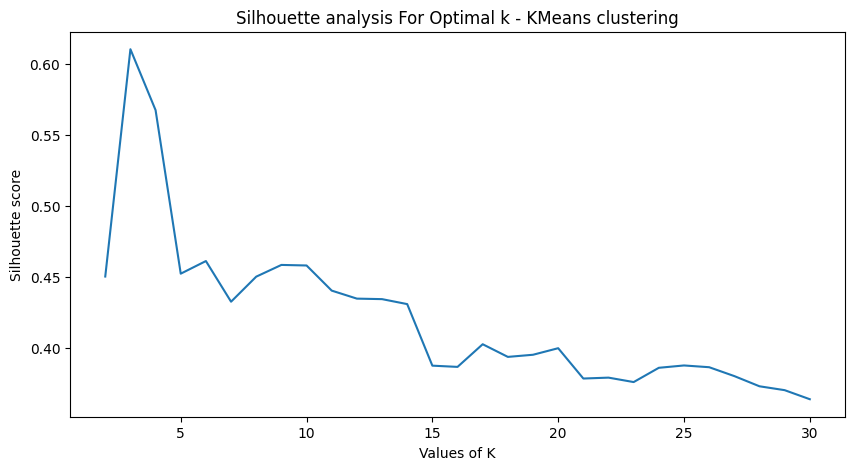

In [ ]:
# Silhouette score for different number of clusters

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(111.7312080429124, np.float64(0.5676594364770726))


In [ ]:
df1['kmeans_cluster'] = kmeans.labels_

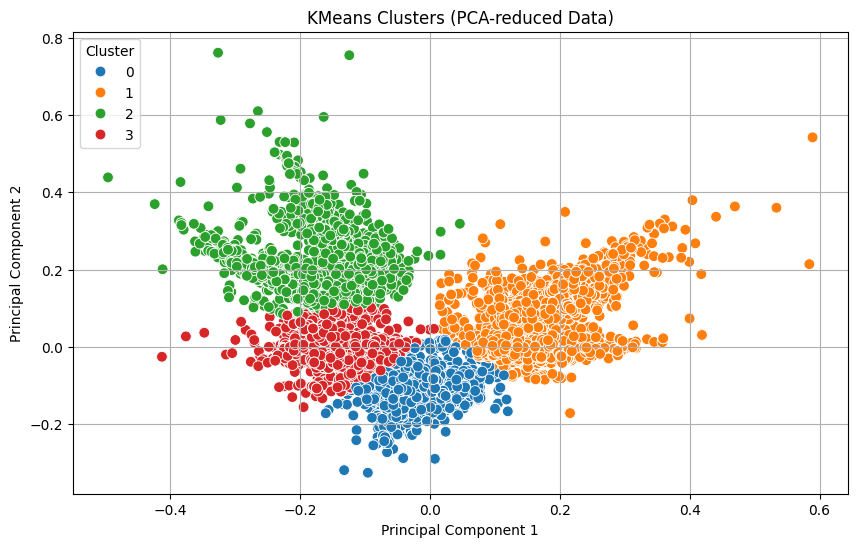

In [ ]:
# Ensure df1 has the PCA columns (assume it's already included or merge if not)
df1['PC1'] = x_pca[:, 0]
df1['PC2'] = x_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', hue='kmeans_cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **Hierarchical clustering**

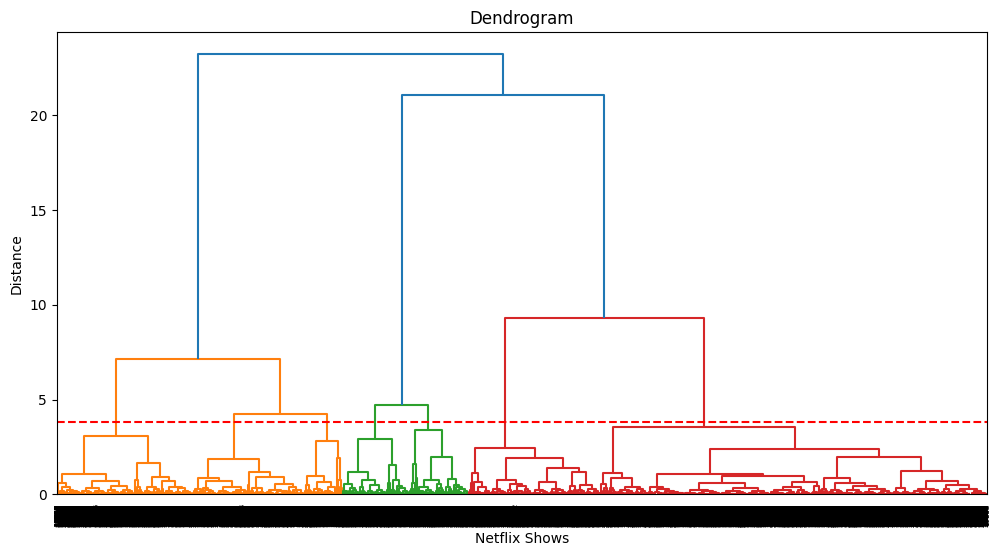

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(12, 6))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

7 clusters can be built using the agglomerative clustering algorithm.

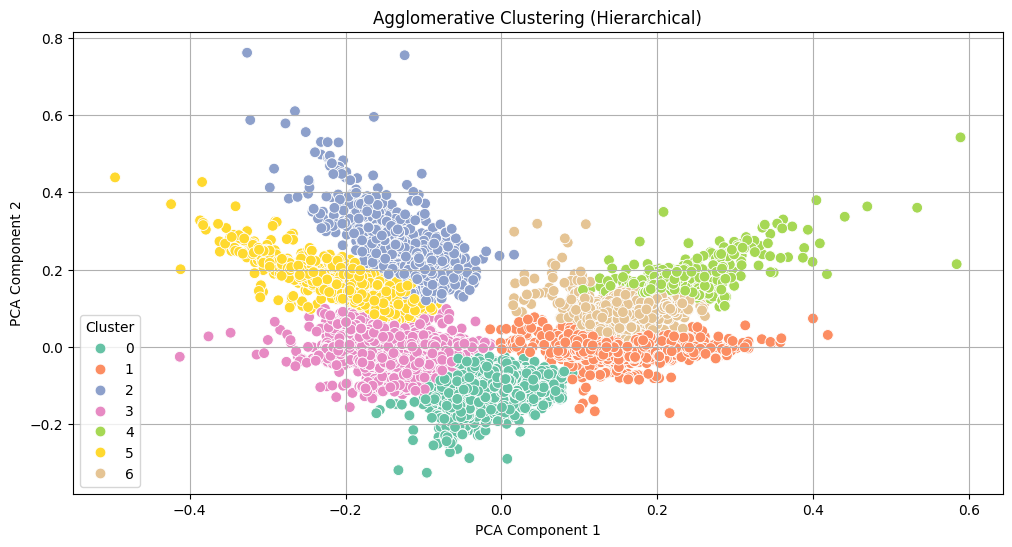

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

df1['hierarchical_cluster'] = hierarchical.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title('Agglomerative Clustering (Hierarchical)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)

In [ ]:
# Assuming X is your feature matrix (e.g., TF-IDF or PCA-reduced data)
hierarchical = AgglomerativeClustering(n_clusters=7, linkage='ward')
labels = hierarchical.fit_predict(x_pca)

# Compute silhouette score
score = silhouette_score(x_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5197998524514882


## **Conclusion**

The Netflix content analysis project effectively used Exploratory Data Analysis, hypothesis testing, and clustering techniques to uncover meaningful insights from the dataset. By exploring the distribution of content types, genres, release years, and countries, we gained a deeper understanding of Netflix's content strategy. The clustering analysis provided an additional perspective by categorizing similar content, making it easier to identify content patterns.

## **How this project is useful for stakeholders**

*   **Content recommendation systems:** Grouping similar content helps in suggesting relevant shows or movies to users.

* **Market segmentation:** Understand user preferences in various countries based on popular clustered genres.

* **Content strategy:** Identify which types of content are growing in popularity and guide future production or licensing decisions.

* **Search optimization:** Enhance the search experience on platforms like Netflix by tagging and grouping content accurately.


